# I Recommend to open in Colab below is the link

https://colab.research.google.com/drive/1KYuVmH6RCYtWndnI-47Cjb_90kCuEN9t?usp=sharing



# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report

from sklearn.model_selection import StratifiedKFold

import pickle


# Reading the data

In [2]:
# Declare file path
file_path = '/content/drive/MyDrive/Xtern/XTern 2024 Artificial Intelegence Data Set.xlsx'

In [3]:
# Read both sheets
data_dict = pd.read_excel(file_path,sheet_name=None)

# Access the DataFrames for each sheet
sheet1_df = data_dict['Xtern_TrainData']
sheet2_df = data_dict['Menu']

# Data Cleaning and Preprocessing

In [4]:
df = pd.merge(sheet1_df, sheet2_df, left_on='Order', right_on='Item', how='inner')

In [5]:
df.drop(columns = ['Unnamed: 0','Item'],inplace=True)

In [6]:
def transform_year(cur_year):

  return int(cur_year.split(" ")[1])

df['Year'] = df['Year'].apply(transform_year)

In [7]:
df.head()

,Year,Major,University,Time,Order,Price,Calories
0,2,Physics,Indiana State University,12,Fried Catfish Basket,10,600
1,2,Biology,Indiana State University,11,Fried Catfish Basket,10,600
2,2,Physics,Butler University,12,Fried Catfish Basket,10,600
3,2,Anthropology,Indiana University-Purdue University Indianapo...,11,Fried Catfish Basket,10,600
4,2,Physics,Butler University,12,Fried Catfish Basket,10,600


# Exploratory data analysis

This section and next section (Business use cases from the insights) are to answer the below question

"Given the data set, do a quick exploratory data analysis to get a feel for the distributions and biases of the data.  Report any visualizations and findings used and suggest any other impactful business use cases for that data."

===================================

## 1. Getting Insights from 'Time' feature

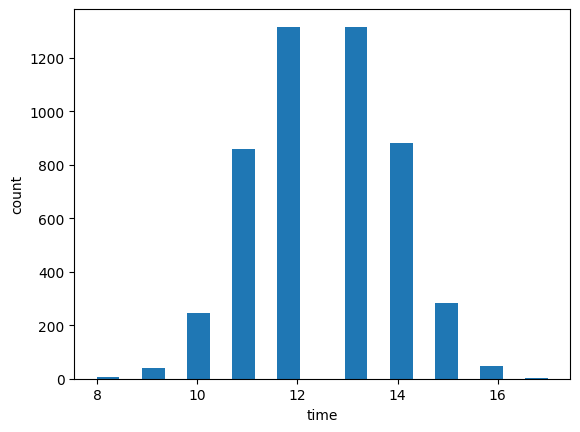

In [8]:
df['Time'].plot(kind='hist',bins=20)
plt.xlabel("time");
plt.ylabel("count");

**Insights from above plot** = It is evident that the majority of customers tend to arrive during the midday hours, particularly between 11:00 AM and 2:00 PM

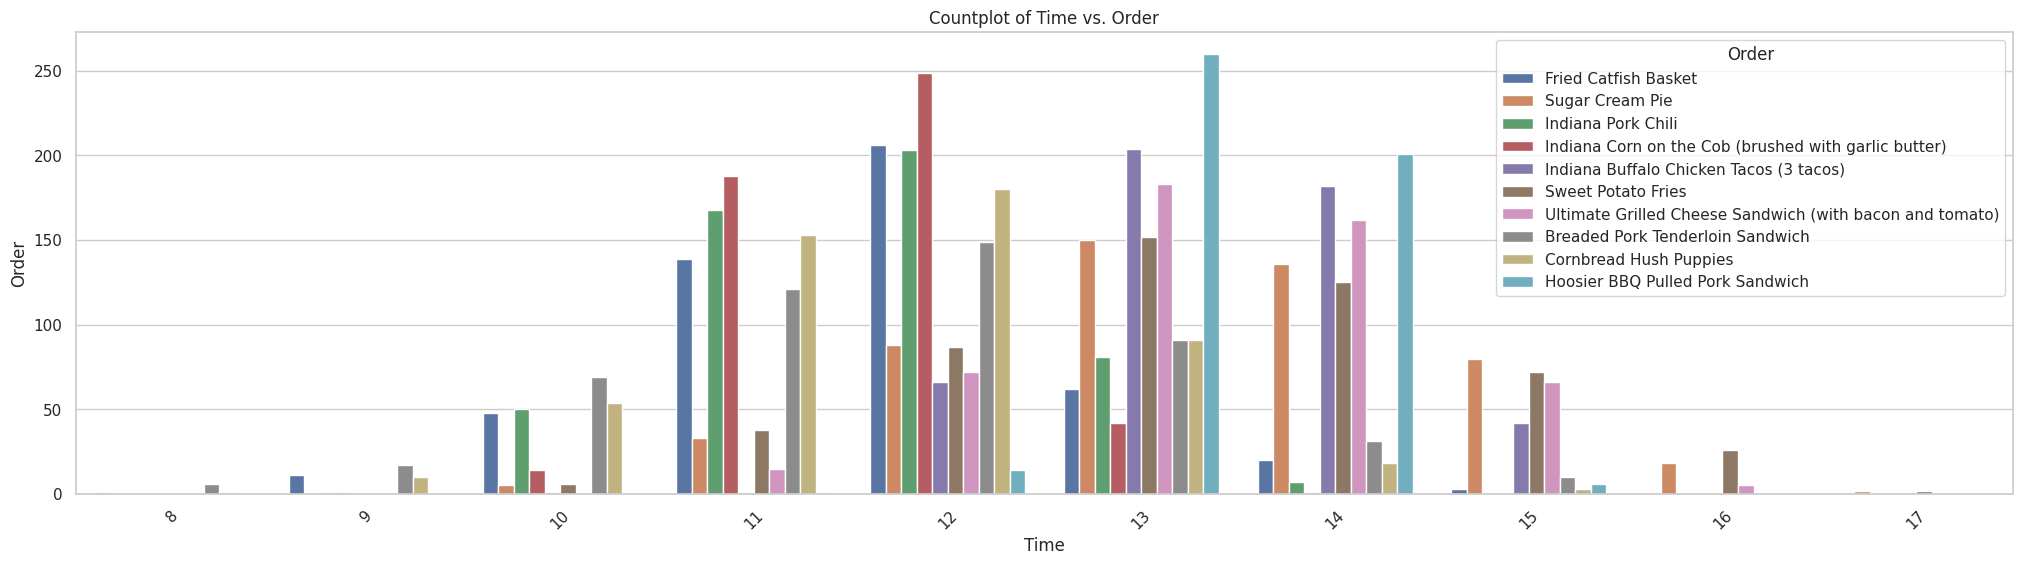

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(25, 6))
sns.countplot(x='Time', hue='Order', data=df)

plt.xlabel('Time')
plt.ylabel('Order')
plt.title('Countplot of Time vs. Order')

# Rotate x-axis labels for better visibility (if necessary)
plt.xticks(rotation=45)

# Show the plot
plt.show()


**Insights from above plot** = During the time frame of 10:00 AM to 12:00 PM, there is a noticeable trend where customers predominantly select items such as Fried Catfish Basket, Indiana Pork Chili, Cornbread Hush Puppies, and Indiana Corn on the Cob (enhanced with garlic butter). Subsequently, post 12:00 PM, there is a shift in customer preferences towards Hoosier BBQ Pulled Pork Sandwich, Indiana Buffalo Chicken Tacos, Sugar Cream Pie, Ultimate Grilled Cheese Sandwich (with bacon and tomato), and Sweet Potato Fries.

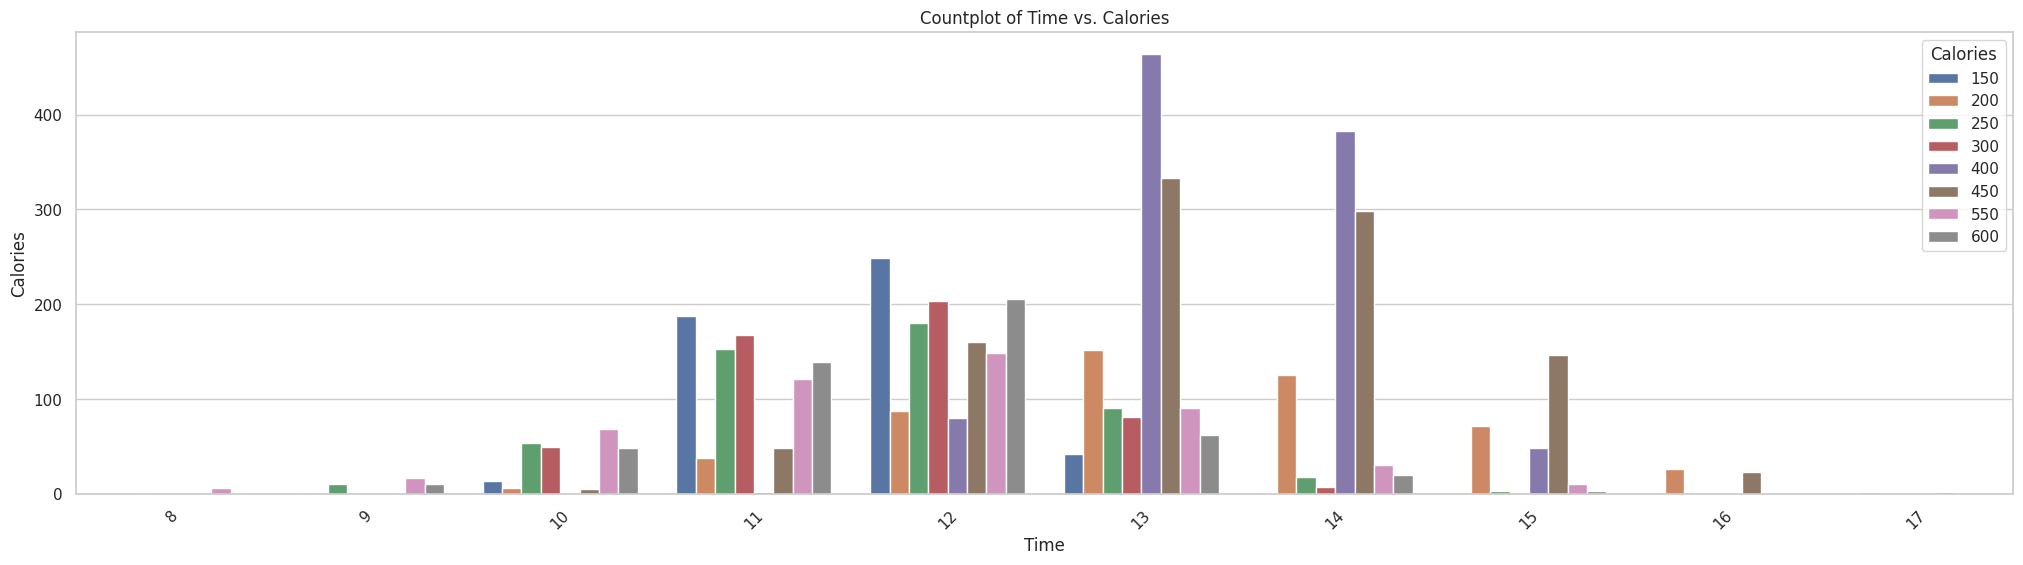

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(25, 6))
sns.countplot(x='Time', hue='Calories', data=df)

plt.xlabel('Time')
plt.ylabel('Calories')
plt.title('Countplot of Time vs. Calories')

# Rotate x-axis labels for better visibility (if necessary)
plt.xticks(rotation=45)

# Show the plot
plt.show()


**Insights from above plot** = Between the hours of 10:00 AM and 12:00 PM, customers tend to favor food options with lower calorie content. However, post 12:00 PM, there is a noticeable inclination towards selections with moderately higher calorie content.

## 2. Getting Insights from 'Year' feature

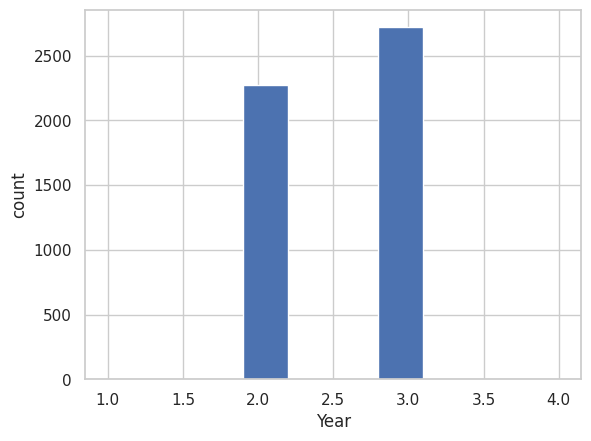

In [11]:
df['Year'].plot(kind='hist')
plt.xlabel("Year");
plt.ylabel("count");

**Insights from above plot** = In general, there is a higher frequency of orders from students in their second and third years compared to those in their first and fourth years.

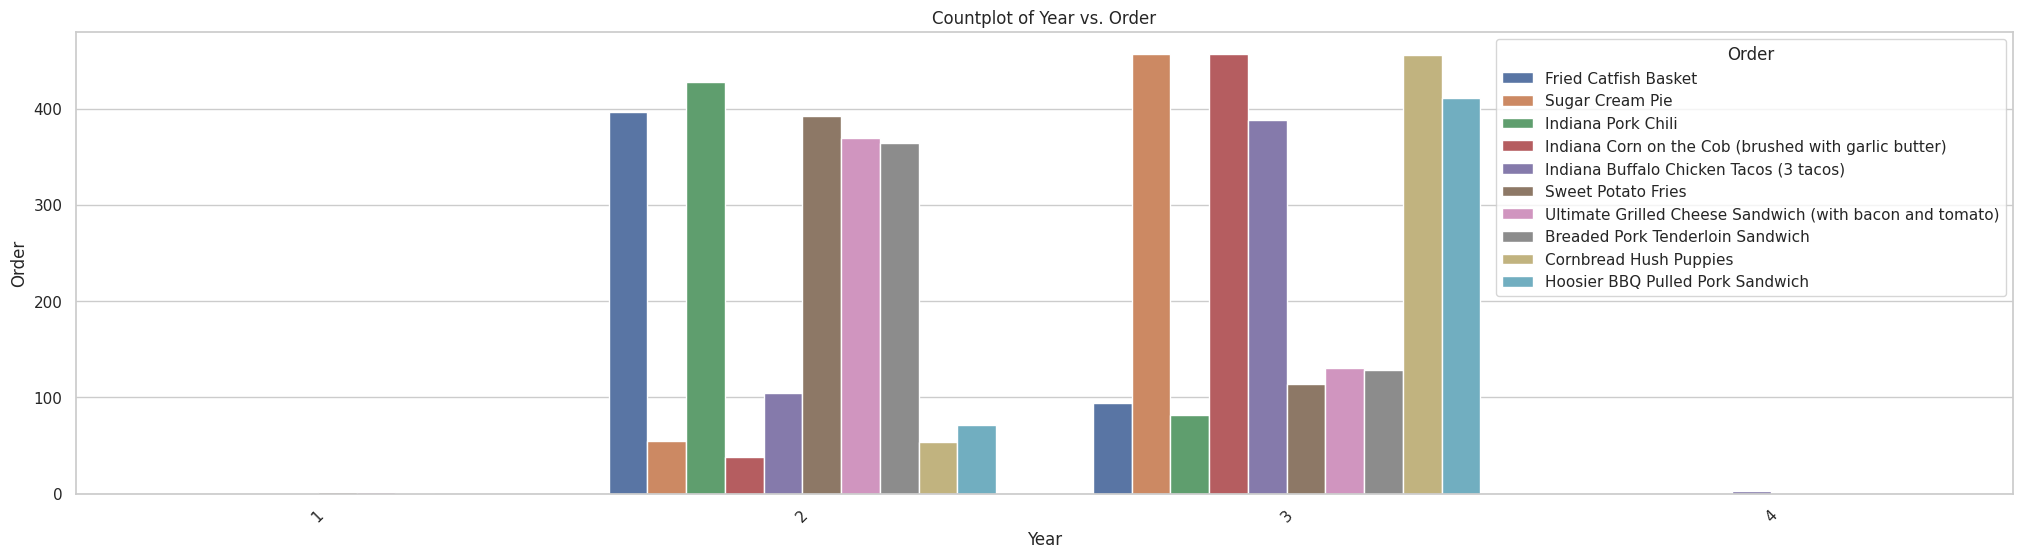

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(25, 6))
sns.countplot(x='Year', hue='Order', data=df)

plt.xlabel('Year')
plt.ylabel('Order')
plt.title('Countplot of Year vs. Order')

# Rotate x-axis labels for better visibility (if necessary)
plt.xticks(rotation=45)

# Show the plot
plt.show()


**Insights from above plot** = A discernible inverse correlation exists between a student's academic year and their choice of orders. The items favored by second-year students exhibit lower popularity among third-year students, and conversely.

## 3. Getting Insights from 'Major' feature

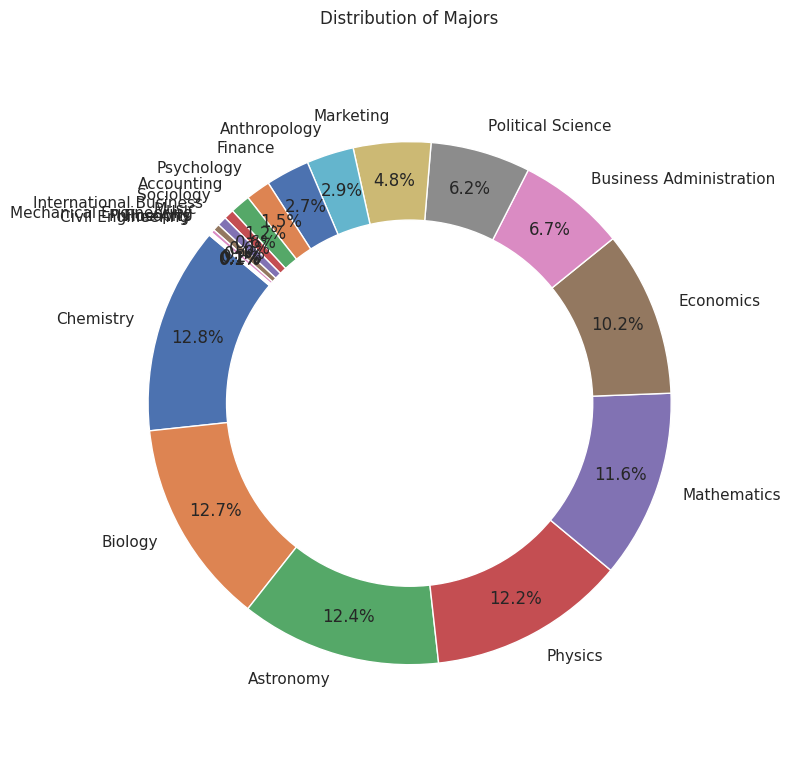

In [13]:
# Calculate the counts for each major
major_counts = df['Major'].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(major_counts, labels=major_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85,
        wedgeprops=dict(width=0.4, edgecolor='w'))

# Draw a white circle at the center to create the 'donut' effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title
plt.title('Distribution of Majors')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

**Insights from above plot** = The predominant academic disciplines among customer base typically encompass fields such as Physics, Chemistry, Biology, Astronomy, Mathematics, Economics, Business Administration, and Political Sciences.

## 4. Getting Insights from 'University' Feature

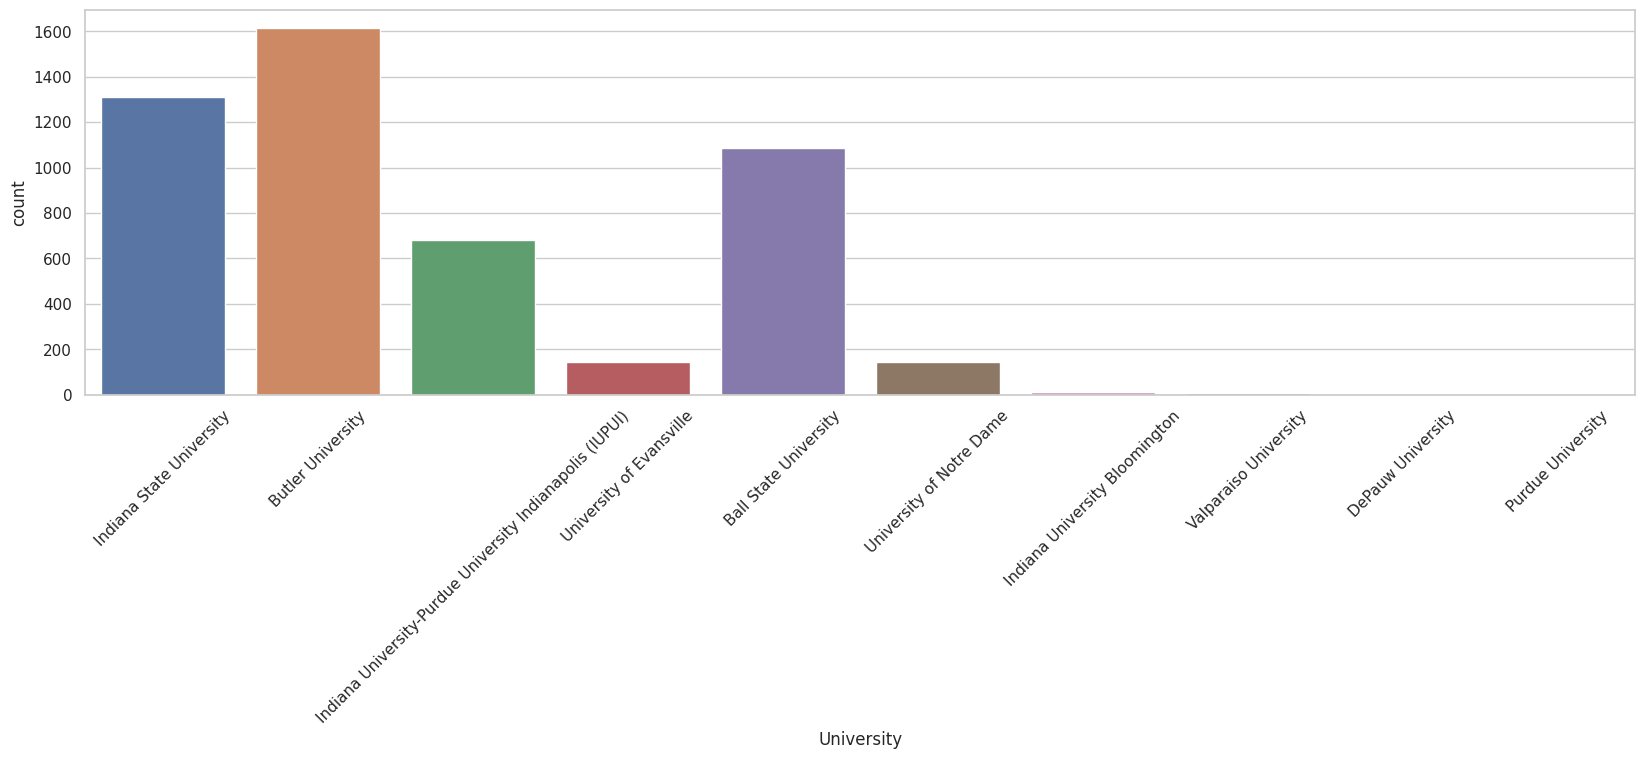

In [14]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['University'])

plt.xlabel("University");
plt.xticks(rotation=45)
plt.ylabel("count");

**Insights from above plot** = A substantial quantity of reliable data has been amassed from Indiana State University, Butler State University, IUPUI, and Ball State University. Consequently, drawing conclusions based on data from other universities would introduce a potential bias into the analysis.

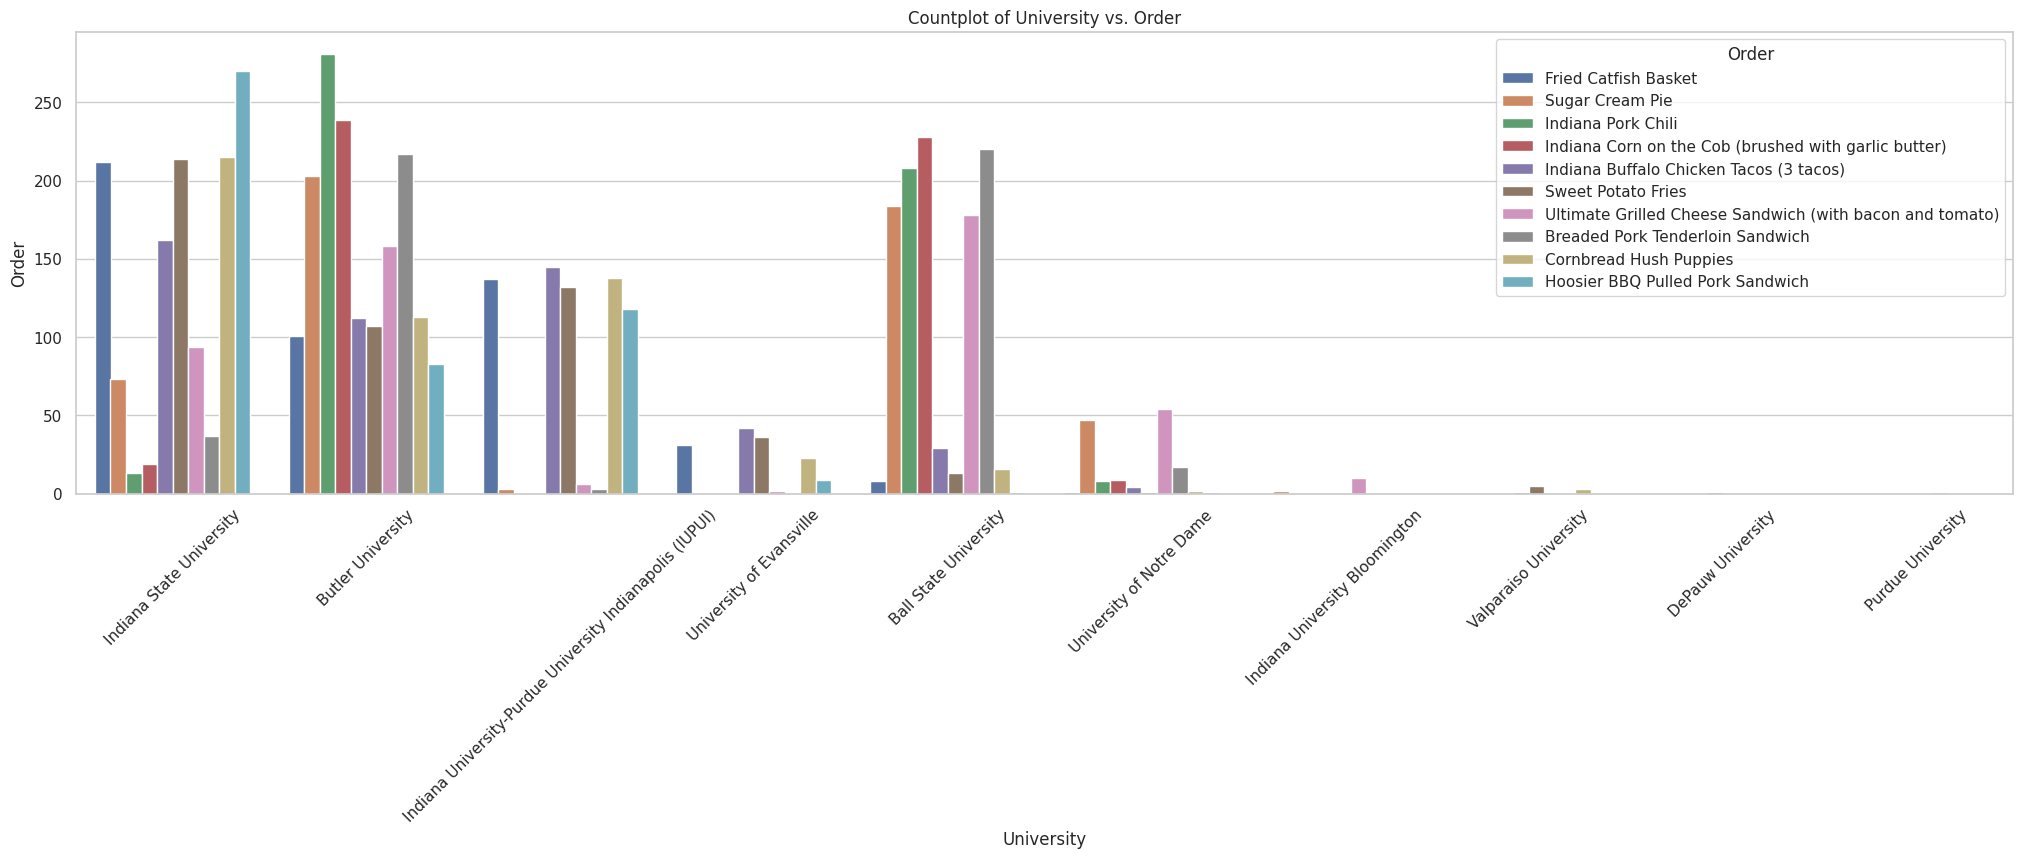

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(25, 6))
sns.countplot(x='University', hue='Order', data=df)

plt.xlabel('University')
plt.ylabel('Order')
plt.title('Countplot of University vs. Order')

# Rotate x-axis labels for better visibility (if necessary)
plt.xticks(rotation=45)

# Show the plot
plt.show()


**Insights from above plot** = The preferences of each university is listed below:

1. **Ball State University**:
   - Top 5 Orders:
      - Indiana Corn on the Cob (brushed with garlic butter)
      - Breaded Pork Tenderloin Sandwich
      - Indiana Pork Chili
      - Sugar Cream Pie
      - Ultimate Grilled Cheese Sandwich (with bacon and tomato)

2. **Butler University**:
   - Top 5 Orders:
      - Indiana Pork Chili
      - Indiana Corn on the Cob (brushed with garlic butter)
      - Breaded Pork Tenderloin Sandwich
      - Sugar Cream Pie
      - Ultimate Grilled Cheese Sandwich (with bacon and tomato)

3. **DePauw University**:
   - Top Order:
      - Indiana Buffalo Chicken Tacos (3 tacos)

4. **Indiana State University**:
   - Top 5 Orders:
      - Hoosier BBQ Pulled Pork Sandwich
      - Cornbread Hush Puppies
      - Sweet Potato Fries
      - Fried Catfish Basket
      - Indiana Buffalo Chicken Tacos (3 tacos)

5. **Indiana University Bloomington**:
   - Top 2 Orders:
      - Ultimate Grilled Cheese Sandwich (with bacon and tomato)
      - Sugar Cream Pie

6. **IUPUI (Indiana University-Purdue University Indianapolis)**:
   - Top 5 Orders:
      - Indiana Buffalo Chicken Tacos (3 tacos)
      - Cornbread Hush Puppies
      - Fried Catfish Basket
      - Sweet Potato Fries
      - Hoosier BBQ Pulled Pork Sandwich

7. **Purdue University**:
   - Top Order:
      - Ultimate Grilled Cheese Sandwich (with bacon and tomato)

8. **University of Evansville**:
   - Top 5 Orders:
      - Indiana Buffalo Chicken Tacos (3 tacos)
      - Sweet Potato Fries
      - Fried Catfish Basket
      - Cornbread Hush Puppies
      - Hoosier BBQ Pulled Pork Sandwich

9. **University of Notre Dame**:
   - Top 5 Orders:
      - Ultimate Grilled Cheese Sandwich (with bacon and tomato)
      - Sugar Cream Pie
      - Breaded Pork Tenderloin Sandwich
      - Indiana Corn on the Cob (brushed with garlic butter)
      - Indiana Pork Chili

10. **Valparaiso University**:
    - Top 3 Orders:
      - Sweet Potato Fries
      - Cornbread Hush Puppies
      - Indiana Buffalo Chicken Tacos (3 tacos)

## 5. Getting insights from the Price and Calories

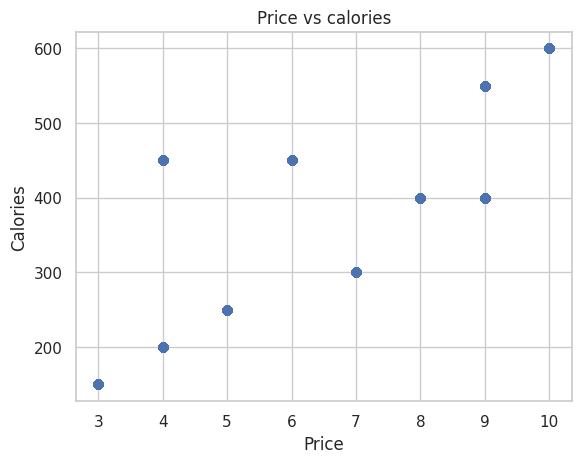

In [16]:
plt.scatter(df['Price'], df['Calories'])
plt.xlabel('Price')
plt.ylabel('Calories')
plt.title('Price vs calories')
plt.show()

**Insights from above plot** = There is almost an linear relationship between Price and Calories

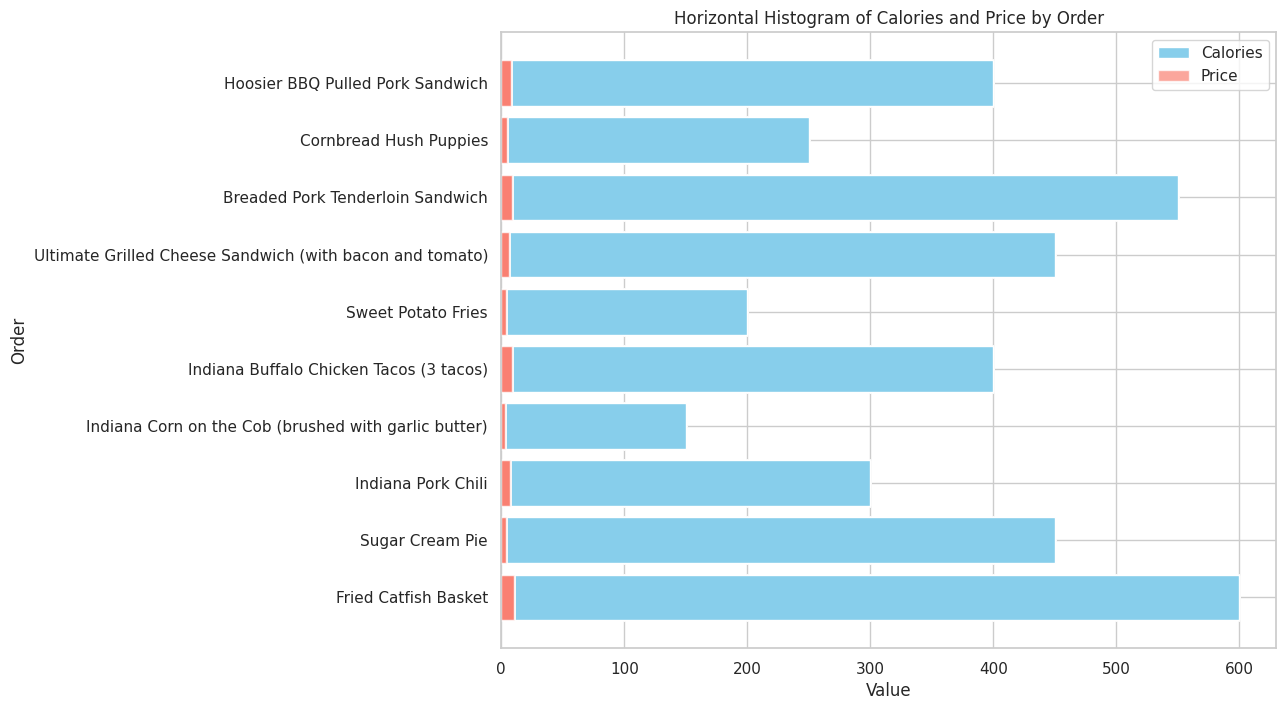

In [17]:
orders = df['Order']
calories = df['Calories']
price = df['Price']

fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(orders, calories, color='skyblue', label='Calories')
ax.barh(orders, price, color='salmon', alpha=0.7, label='Price')

ax.set_xlabel('Value')
ax.set_ylabel('Order')
ax.set_title('Horizontal Histogram of Calories and Price by Order')

ax.legend()

plt.show()

## 6. Realtionship between all the data

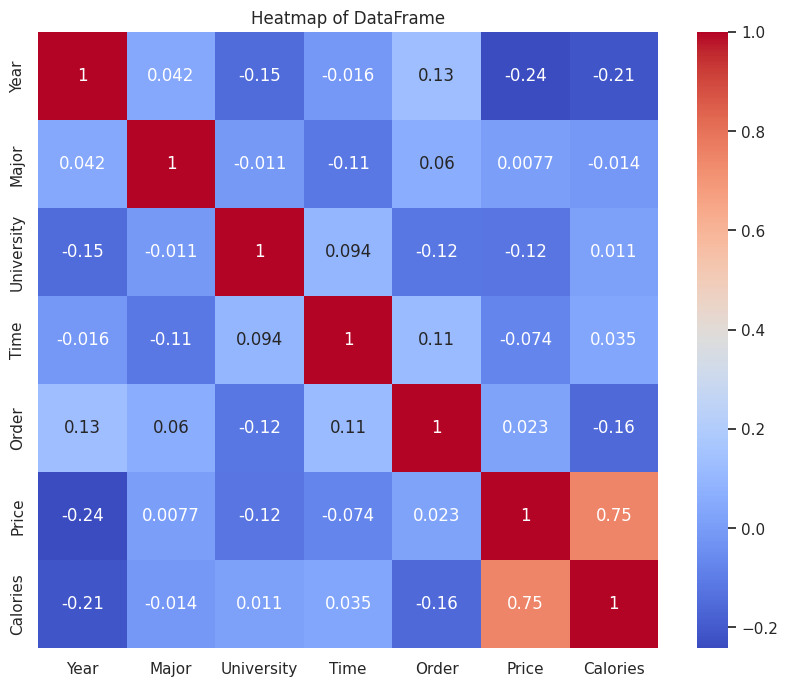

In [18]:
# Convert string values to categorical codes
df_encoded = df.apply(lambda col: pd.factorize(col)[0] if col.dtype == 'object' else col)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of DataFrame')
plt.show()

# Business use cases from the insights

1. **Menu Choices for Peak Hours**:

   - *What I Found*: It seems that between 11:00 AM and 2:00 PM, customers really go for options like Fried Catfish Basket, Indiana Pork Chili, Cornbread Hush Puppies, and Indiana Corn on the Cob (with garlic butter).

   - *Why It Matters*: Offering more of these during these times could lead to higher sales and happier customers.

2. **Specials for Busy Hours**:

   - *What I Discovered*: From 10:00 AM to 12:00 PM and after 12:00 PM, items like Hoosier BBQ Pulled Pork Sandwich, Indiana Buffalo Chicken Tacos, Sugar Cream Pie, Ultimate Grilled Cheese Sandwich (with bacon and tomato), and Sweet Potato Fries are big hits.

   - *Why It's Important*: Introducing special deals for these periods could attract more customers and increase sales.

3. **Tailoring to Student Years**:

   - *What I Noted*: Second and third-year students tend to order more frequently compared to first and fourth-year students.

   - *Why It Makes Sense*: Creating promotions or loyalty programs specifically for these groups could boost sales.

4. **Catering to Different Universities**:

   - *What I Found for Each University*: I tailored strategies for each university based on their preferences. For example, for Ball State University, top picks include Indiana Corn on the Cob, Breaded Pork Tenderloin Sandwich, Indiana Pork Chili, Sugar Cream Pie, and Ultimate Grilled Cheese Sandwich (with bacon and tomato).

   - *Why This Matters*: This approach shows that we understand what each university likes, which can lead to happier customers.

5. **Options for Different Dietary Preferences**:

   - *What I Suggested*: Offering lighter options from 10:00 AM to 12:00 PM and heartier ones after 12:00 PM could cater to various dietary needs.

   - *Why It's Worth Considering*: This could lead to higher customer satisfaction and attract a wider range of customers.

6. **Optimizing Busy Hours**:

   - *What I Propose*: Let's make the most of our busiest hours, between 11:00 AM and 2:00 PM. We could consider offering more promotions, specials, or faster service to take advantage of the higher foot traffic.

   - *Why This Can Help*: It could lead to more satisfied customers, higher turnover, and potentially increased revenue.

7. **Affordable and Healthy Options**:

   - *What I Noticed*: There's a clear trend - as the price goes up, so does the calorie content.

   - *Why It's Important*: Offering affordable, lower-calorie options can attract budget-conscious customers while maintaining profitability.

# Ethical, Business, and Technical Implications of data collection, storage, and data biases

This section answers the below question:

"Consider implications of data collection, storage, and data biases you would consider relevant here considering Data Ethics, Business Outcomes, and Technical Implications"

===============================================

**Ethical Implications**:

1. **Data Collection**:
   - *Ethical Considerations*: Obtain explicit consent from students for data collection, ensuring transparency about how their information will be used. Provide an option for students to opt out if they do not wish to participate.

   - As it's observed from the insights, some universities have significantly less data available. To avoid selection bias and potential overfitting of the model, it is imperative to prioritize data collection efforts at these universities.

2. **Data Storage**:
   - *Ethical Considerations*: Implement robust security measures to protect student data, including encryption, access controls, and regular security audits. Comply with data protection regulations to safeguard privacy.

3. **Data Biases**:
   - *Ethical Considerations*: Be vigilant about potential biases in the data, especially if certain groups are overrepresented or underrepresented. Take steps to address and mitigate biases to ensure fairness in predictions.

   - The data insights indicate that certain universities and majors may be underrepresented in the dataset. It's crucial to actively seek out diverse representation to avoid biases in predictions that could disadvantage students from less represented universities and majors.

**Business Outcome Implications**:

1. **Data Collection**:
   - *Business Outcome*: Ethical data collection practices can lead to higher trust levels among students, resulting in increased app adoption and higher participation in the promotion.

2. **Data Storage**:
   - *Business Outcome*: Secure data storage minimizes the risk of data breaches, preserving the brand's reputation and avoiding potential legal and financial repercussions.

3. **Data Biases**:
   - *Business Outcome*: Reducing biases in the prediction model improves the accuracy of order predictions. This, in turn, leads to fewer orders requiring a 10% discount, contributing to higher profitability.

**Technical Implications**:

1. **Data Collection**:
   - *Technical Considerations*: Use secure protocols (e.g., HTTPS) for data transmission to prevent unauthorized access or tampering during collection. Implement data validation checks to ensure accuracy and integrity.

2. **Data Storage**:
   - *Technical Considerations*: Utilize secure data storage solutions with appropriate redundancy, backups, and disaster recovery plans. Consider encryption at rest and in transit for added protection.

3. **Data Biases**:
   - *Technical Considerations*: Regularly monitor and analyze the prediction model for biases. Implement techniques like fairness-aware algorithms, data augmentation, and diverse training data to ensure fairness and accuracy.

# Building the AI models

This section answers the below question:

 "Build a model to predict a customers order from their available information.  You will be graded largely on your intent and process when designing the model, performance is secondary. It is strongly suggested that you use SKLearn for this model as to not take too much time.  You may use any kind implementation you would like though, but it must be pickelable and have a “.predict()” method similar to SKLearn"

=================

I intend to develop an artificial intelligence model designed to leverage input variables, including the customer's academic year, major field of study, university affiliation, and the time factor, to accurately forecast and predict their ordering behavior.

In [19]:
# utility functions

def transform_year(cur_year):
    return int(cur_year.split(" ")[1])

def label_encoding(df, column_name):
    le = LabelEncoder()
    df[column_name] = le.fit_transform(df[column_name])
    return df, le

def read_data(file_path):
    return pd.read_excel(file_path)

In [20]:
def create_data(df, training=True, label_encoders=None):
    df['Year'] = df['Year'].apply(transform_year)
    column_names = ['Major', 'University']

    if training:
        column_names.append("Order")
        label_encoder_dict = dict()

        for column_name in column_names:
            df, cur_le = label_encoding(df, column_name)
            label_encoder_dict[column_name] = cur_le

        return df, label_encoder_dict
    else:
        for key, value in label_encoders.items():
            df[key] = value.transform(df[key])

        return df, label_encoders

In [21]:
def save_model(model, file_name='random_forest_model.pkl'):
    with open(file_name, 'wb') as model_file:
        pickle.dump(model, model_file)

def train_model(X, y, n_splits=5, min_samples_leaf=5, random_state=42):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    best_model = None
    highest_f1_score = -float('inf')
    final_X_test = None
    final_y_test = None

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        cur_score = f1_score(y_pred, y_test, average='weighted')

        if cur_score > highest_f1_score:
            highest_f1_score = cur_score
            best_model = model
            final_X_test = X_test
            final_y_test = y_test

    return best_model, highest_f1_score, final_X_test, final_y_test

In [22]:
def main(file_path):
    df = read_data(file_path)
    df, label_encoders = create_data(df)

    X = df.drop(columns=['Order']).to_numpy()
    y = df['Order']

    best_model, highest_f1_score, final_X_test, final_y_test = train_model(X, y)

    # Save the model
    save_model(best_model)

    y_pred = best_model.predict(final_X_test)
    print(f"The F1 score achieved by our best model is {highest_f1_score}")
    print()

    cm = confusion_matrix(final_y_test, y_pred)

    # Plotting Confusion Matrix
    classes_list = list(range(10))
    classes_labels = label_encoders["Order"].inverse_transform(classes_list)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=classes_labels, yticklabels=classes_labels)
    plt.title("Confusion Matrix")
    plt.show()

    # Classifiction Report
    le = label_encoders["Order"]
    y_true_labels = le.inverse_transform(final_y_test)
    y_pred_labels = le.inverse_transform(y_pred)

    # Getting unique class names
    class_names = le.classes_

    # Generating the classification report with class names
    report = classification_report(y_true_labels, y_pred_labels, target_names=class_names)
    print()
    print("=============== Classification Report ===============")
    print(report)
    print()

    # Plotting Feature Importance of Random Forest Model
    feature_importance = best_model.feature_importances_
    feature_names = ['Year', 'Major', 'University', 'Time']  # Replace with your actual feature names

    # Plotting Feature Importance
    plt.barh(range(len(feature_importance)), feature_importance, align="center")
    plt.yticks(range(len(feature_importance)), feature_names)
    plt.xlabel('Feature Importance')
    plt.title('Random Forest Feature Importance')
    plt.show()


The F1 score achieved by our best model is 0.6744056020939088



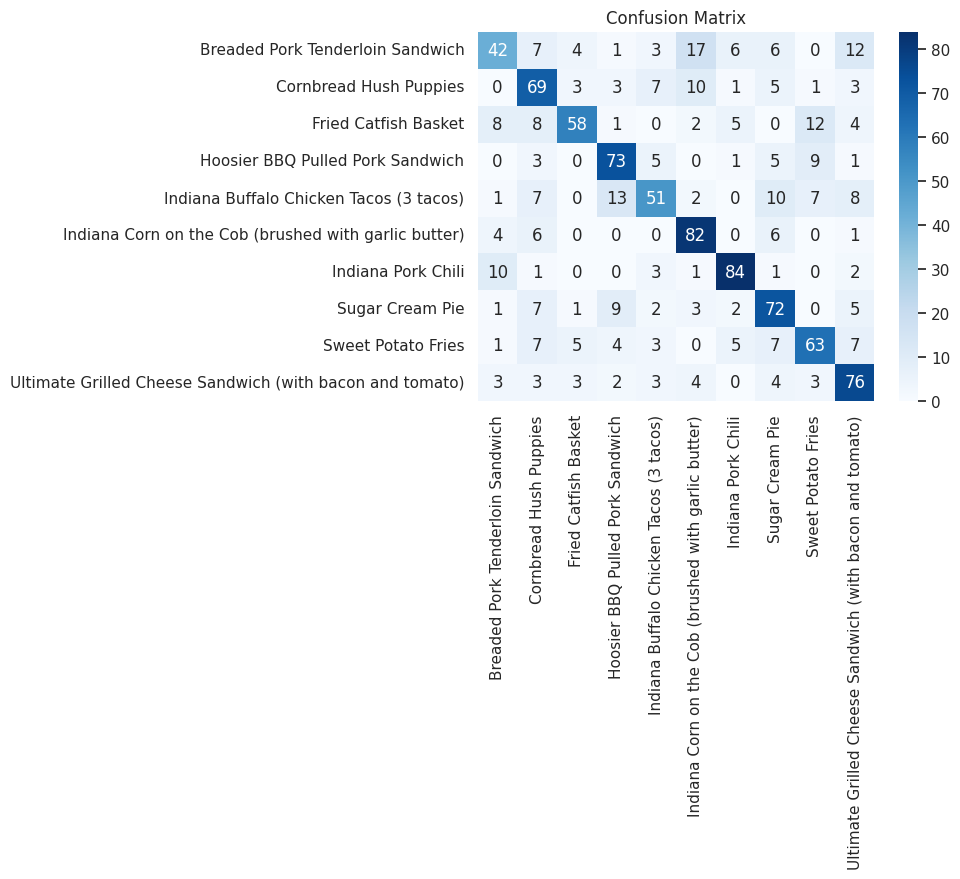


=============== Classification Report ===============
                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.60      0.43      0.50        98
                                  Cornbread Hush Puppies       0.58      0.68      0.63       102
                                    Fried Catfish Basket       0.78      0.59      0.67        98
                        Hoosier BBQ Pulled Pork Sandwich       0.69      0.75      0.72        97
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.66      0.52      0.58        99
    Indiana Corn on the Cob (brushed with garlic butter)       0.68      0.83      0.75        99
                                      Indiana Pork Chili       0.81      0.82      0.82       102
                                         Sugar Cream Pie       0.62      0.71      0.66       102
                                      Sweet Potato Fries      

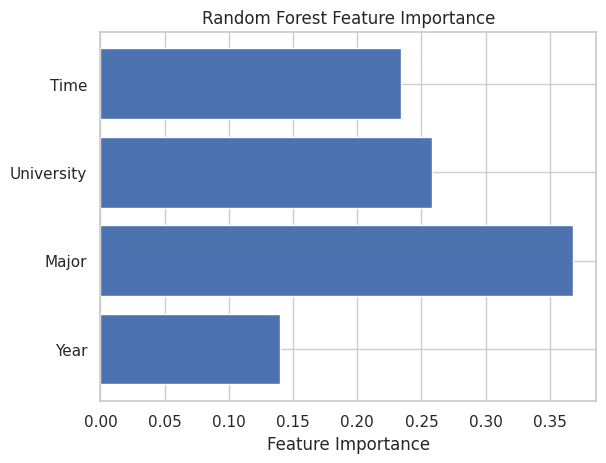

In [23]:
main(file_path)

# Key Considerations to Enhance Model Performance

This section answers the below question:

"Given the work required to bring a solution like this to maturity and its performance, what considerations would you make to determine if this is a suitable course of action?"

==========================================

In considering the feasibility and implementation of an AI-driven order prediction system for FoodX, there are several crucial factors that demand careful evaluation.

1. **Data Imbalance**:
   - The data exhibits significant skewness, primarily due to the limited amount of available data. Addressing this imbalance through the collection of more data is recommended. For instance, certain universities have a notably smaller dataset, potentially leading to selection bias. Gathering additional data would help mitigate this issue and enhance the robustness of our predictive model.

2. **Feature Set**:
   - The current feature set used for predicting orders is relatively limited, consisting of only four variables. Expanding this set to include additional relevant features such as weather conditions, BMI, age, and gender (some food may be popular maybe popular among specific gender).

3. **Recommender System Paradigm**:
   - Given the nature of this system as a recommender, integrating a mechanism to leverage past user behavior for more accurate predictions is paramount. Establishing a robust database to capture and analyze user preferences over time would greatly contribute to refining our predictive capabilities.